In [3]:
import pandas as pd
df = pd.read_csv("clean.csv")

In [14]:

df.columns

Index(['target', 'message', 'num_char', 'word_counts', 'sentance_count',
       'preprocess_data', 'tf_num_char', 'tf_word_counts',
       'tf_sentance_count'],
      dtype='object')

<Axes: >

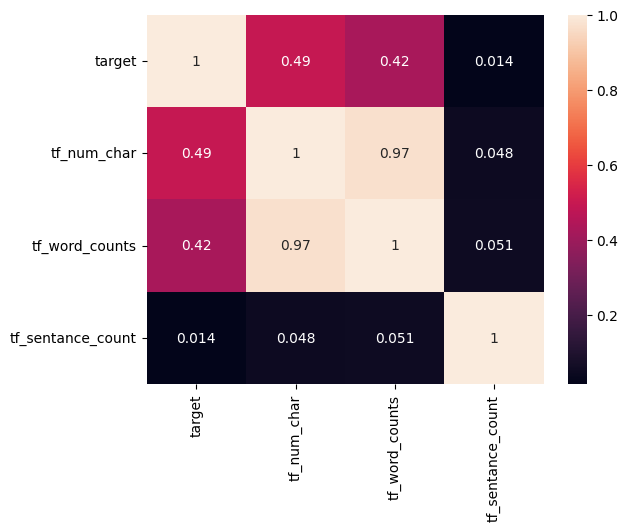

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns


df1 = df[['target','tf_num_char', 'tf_word_counts','tf_sentance_count']]
sns.heatmap(df1.corr(), annot= True)

In [29]:
def vocab_count(text):
    # Check if the input is a string
    if isinstance(text, str):
        # Convert the text to lowercase to ensure case-insensitive counting
        text = text.lower()

        # Tokenize the text by splitting it into words
        words = text.split()

        # Create a set to store unique words
        unique_words = set(words)

        # Calculate the vocabulary size
        vocab_size = len(unique_words)
        return vocab_size
    else:
        return 0  # Return 0 for non-string values

df["vocab_count"] = df["preprocess_data"].apply(vocab_count)


In [32]:
df[['vocab_count','preprocess_data']]

,vocab_count,preprocess_data
0,16,go jurong point crazy available bugis n great ...
1,4,ok lar joking oni
2,21,free entry 2 weekly comp win fa cup final tkts...
3,6,dun say early hor c already say
4,8,nah dont think go usf life around though
...,...,...
5164,17,2nd time tried 2 contact 750 pound prize 2 cla...
5165,5,b going esplanade fr home
5166,4,pity mood soany suggestion
5167,14,guy bitching acted like id interested buying s...


In [36]:
df.dropna()

,target,message,num_char,word_counts,sentance_count,preprocess_data,tf_num_char,tf_word_counts,tf_sentance_count,vocab_count
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazy available bugis n great ...,82,16,1,16
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joking oni,17,4,1,4
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entry 2 weekly comp win fa cup final tkts...,137,23,1,21
3,0,U dun say so early hor... U c already then say...,49,13,1,dun say early hor c already say,31,7,1,6
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah dont think go usf life around though,40,8,1,8
...,...,...,...,...,...,...,...,...,...,...
5164,1,This is the 2nd time we have tried 2 contact u...,161,35,4,2nd time tried 2 contact 750 pound prize 2 cla...,106,18,1,17
5165,0,Will Ì_ b going to esplanade fr home?,37,9,1,b going esplanade fr home,25,5,1,5
5166,0,"Pity, * was in mood for that. So...any other s...",57,15,2,pity mood soany suggestion,26,4,1,4
5167,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitching acted like id interested buying s...,81,14,1,14


In [41]:
df[df['preprocess_data'].isnull()].message

939                      Where @
1503                    U too...
2675                  Can a not?
3191                         :) 
4276    :( but your not here....
4500                     :-) :-)
4531                Same to u...
Name: message, dtype: object

In [42]:
df.dropna(subset=['preprocess_data'], inplace=True)

# Reset the index after dropping rows
df.reset_index(drop=True, inplace=True)

In [46]:
df[df.isnull().any(axis=1)]

,target,message,num_char,word_counts,sentance_count,preprocess_data,tf_num_char,tf_word_counts,tf_sentance_count,vocab_count


In [33]:
max(df.vocab_count)

62

In [47]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [48]:
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [49]:
x = tfidf.fit_transform(df['preprocess_data']).toarray()


In [50]:
x.shape

(5162, 3000)

In [55]:
y = df.target.values

In [56]:
y

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix,precision_score


In [60]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [61]:
print(f"Shape of x_train: {x_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of x_test: {x_test.shape}")
print(f"Shape of x_test: {y_test.shape}")

Shape of x_train: (4129, 3000)
Shape of y_train: (4129,)
Shape of x_test: (1033, 3000)
Shape of x_test: (1033,)


In [62]:
mn = MultinomialNB()


# MultinomialNB

In [63]:
mn.fit(x_train,y_train)

MultinomialNB()

In [64]:
y_pred = mn.predict(x_test)

In [65]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [68]:
accuracy_score(y_test,y_pred)

0.978702807357212

In [69]:
confusion_matrix(y_test,y_pred)

array([[899,   1],
       [ 21, 112]], dtype=int64)

In [75]:
precision_score(y_test,y_pred)

0.9911504424778761

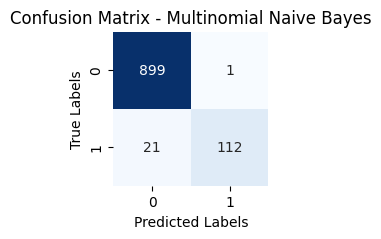

In [74]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm_multinomial = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using seaborn
plt.figure(figsize=(2,2))
sns.heatmap(cm_multinomial, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Multinomial Naive Bayes')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# gn = GaussianNB()

In [76]:
gn = GaussianNB()
gn.fit(x_train,y_train)

GaussianNB()

In [77]:
y_pred_gn = gn.predict(x_test)

In [78]:
accuracy_score(y_test,y_pred_gn)

0.8809293320425944

In [79]:
precision_score(y_test, y_pred_gn)
0.5223214285714286

0.5223214285714286

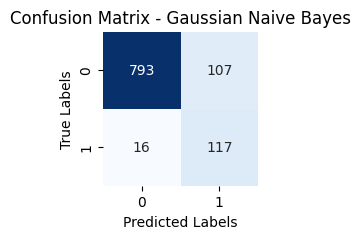

In [80]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm_multinomial = confusion_matrix(y_test, y_pred_gn)

# Plot confusion matrix using seaborn
plt.figure(figsize=(2,2))
sns.heatmap(cm_multinomial, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Gaussian Naive Bayes')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# bn = BernoulliNB()

In [81]:
bn = BernoulliNB()
bn.fit(x_train,y_train)

BernoulliNB()

In [82]:

y_pred_bn = bn.predict(x_test)

In [83]:

accuracy_score(y_test,y_pred_bn)

0.9835430784123911

In [84]:

precision_score(y_test, y_pred_bn)

0.9833333333333333

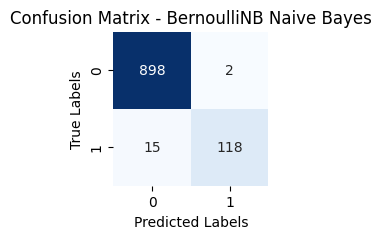

In [85]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm_multinomial = confusion_matrix(y_test, y_pred_bn)

# Plot confusion matrix using seaborn
plt.figure(figsize=(2,2))
sns.heatmap(cm_multinomial, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - BernoulliNB Naive Bayes')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [86]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification


# Creating individual models
logistic_regression = LogisticRegression(random_state=42)
random_forest = RandomForestClassifier(random_state=42)
decision_tree = DecisionTreeClassifier(random_state=42)

# Creating an ensemble using VotingClassifier
ensemble_model = VotingClassifier(estimators=[
    ('logistic_regression', logistic_regression),
    ('random_forest', random_forest),
    ('decision_tree', decision_tree)
], voting='hard')

# Training the ensemble model
ensemble_model.fit(x_train, y_train)

# Making predictions using the ensemble
y_pred_ensemble = ensemble_model.predict(x_test)

# Evaluating the performance
accuracy_ensemble = accuracy_score(y_test, y_pred_ensemble)
precision_ensemble = precision_score(y_test, y_pred_ensemble)

# Displaying the results
print(f'Ensemble Accuracy: {accuracy_ensemble}')
print(f'Ensemble Precision: {precision_ensemble}')


Ensemble Accuracy: 0.972894482090997
Ensemble Precision: 0.9906542056074766
